# 🧪 Lab 1:  K-Means Clustering Implementation


In this lab, we will explore **K-Means Clustering**, an unsupervised learning algorithm used to group data into clusters.  
We will use a sample dataset (`income.csv`) and visualize the results using scatter plots.

---

**Learning Objectives**:
- Implement K-Means using `scikit-learn`
- Visualize clusters with Matplotlib / seaborn
- Use the **Elbow Method** and **Silhouette Score** to find the optimal `k`





## Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Load Dataset

In [2]:
# Load the dataset
data = pd.read_csv("income.csv")

# Display first few rows
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## Exploratory Data Analysis (EDA)

In [3]:
# Basic info
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes
None
             Age      Income($)
count  22.000000      22.000000
mean   34.818182   90431.818182
std     5.901060   43505.964412
min    26.000000   45000.000000
25%    29.000000   58500.000000
50%    36.500000   67500.000000
75%    39.750000  135250.000000
max    43.000000  162000.000000


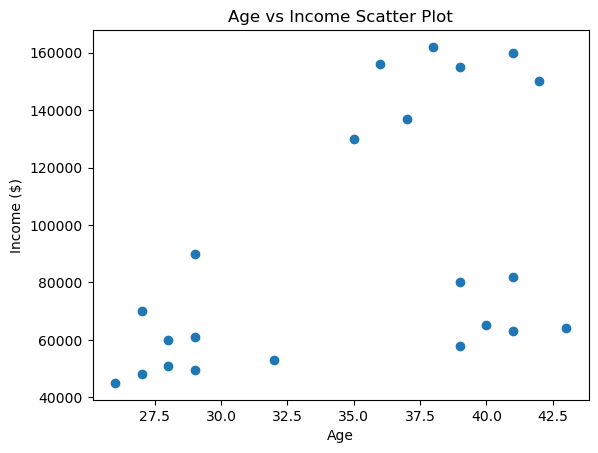

In [4]:
# Quick visualization
plt.scatter(data['Age'], data['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.title("Age vs Income Scatter Plot")
plt.show()

## Apply K-Means Clustering

In [5]:
# Apply KMeans with 3 clusters (example)
km = KMeans(n_clusters=3, n_init='auto')
km.fit(data[["Age", "Income($)"]])
km.labels_



array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
data['Cluster'] = km.labels_
data.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
# scatter plot

<Axes: xlabel='Age', ylabel='Income($)'>

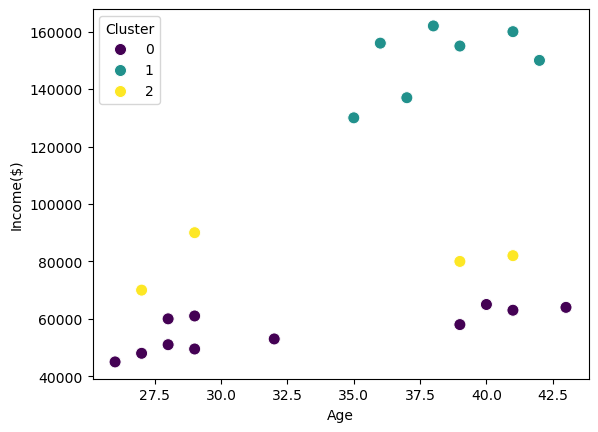

In [8]:
import seaborn as sns

sns.scatterplot(data, x='Age', y='Income($)',  palette='viridis', s=75, hue="Cluster")

When K-Means was applied on Age vs. Income data, the clusters looked incorrect because the features were on very different scales.
- Since Income had much larger values than Age, it dominated the distance calculations.
- To fix this, we need to scale the data (e.g., using **StandardScaler or MinMaxScaler**) so that all features contribute fairly to clustering.
  
**Conclusion**: Always consider **scaling** your data before applying K-Means or any distance-based algorithm.

### MinMax Scaling

Clusters are not formed properly. It can be due to Age and Income columns being on a different scale. We can try scaling them

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_scaled = pd.DataFrame(columns=['Age', 'Income($)'])

data_scaled[["Age", "Income($)"]] = scaler.fit_transform(data[["Age", "Income($)"]])
data_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [10]:
# Apply KMeans with 3 clusters

km = KMeans(n_clusters=3, n_init='auto')
km.fit(data_scaled[["Age", "Income($)"]])
data_scaled['cluster']= km.labels_

<Axes: xlabel='Age', ylabel='Income($)'>

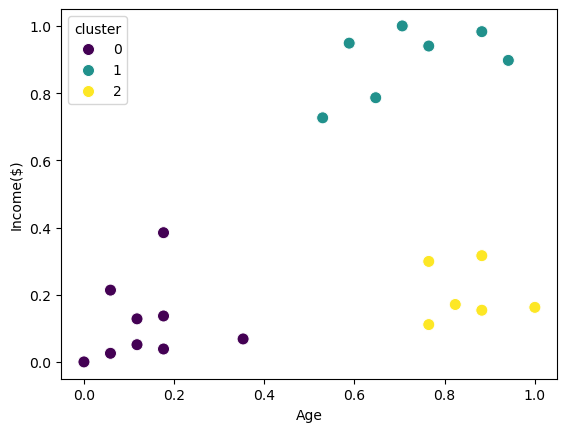

In [11]:
# scatter plot showing the clusters

import seaborn as sns

sns.scatterplot(data_scaled, x='Age', y='Income($)',  palette='viridis', s=75, hue="cluster")


In [12]:
km.inertia_

0.4750783498553096

In [13]:
centroids = km.cluster_centers_
centroids

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

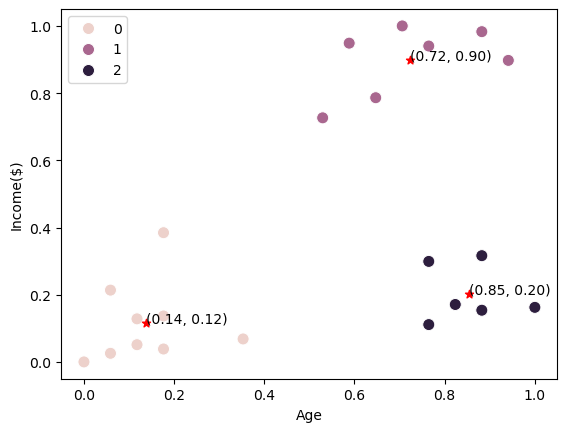

In [14]:
## show the k-Means centroids in scatter plot

sns.scatterplot(data_scaled, x='Age', y='Income($)', s=75, hue=km.labels_)
plt.scatter(centroids[:,0] , centroids[:,1], marker='*', c='red')

for i in range(len(centroids)):
    plt.text(centroids[i,0], centroids[i,1],
             f"({centroids[i,0]:.2f}, {centroids[i,1]:.2f})")

## Elbow Method to determine optimal number of clusters

In [15]:
sse = [] # or WCSS

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(data_scaled[["Age", "Income($)"]])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.3871991429772462,
 0.2247696122877267,
 0.17473586079225928,
 0.14580719346046297,
 0.11073569527418642]

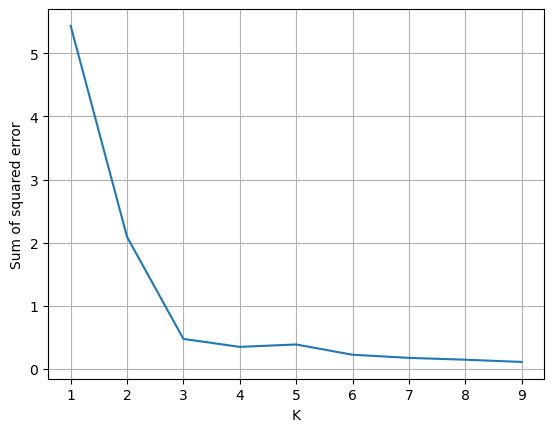

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.grid(True)
plt.show()

The chart shows optimal number of clusters are 3

***

## Silhouette Score to determine optimal number of clusters

In [17]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [18]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(data_scaled)
    score=silhouette_score(data_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [19]:
silhouette_coefficients

[np.float64(0.6844518317257191),
 np.float64(0.8440849267382077),
 np.float64(0.6990747302886349),
 np.float64(0.4906226847637054),
 np.float64(0.2844807953222237),
 np.float64(0.4209335011523019),
 np.float64(0.2668513732505126),
 np.float64(0.26906791353453435),
 np.float64(0.32565864581310144)]

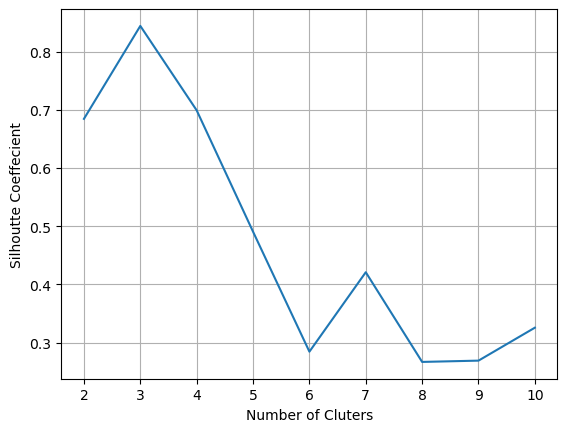

In [20]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.grid(True)
plt.show()